In [ ]:
# this notebook visualizes the inputs to create intitial fuzzy input membership functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Display fuzzy membership functions
colors = ['tab:blue', ':orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'
          'tab:gray', 'tab:olive', 'tab:cyan']

def display_membership_functions(ax, input_name, membership_functions, membership_function_labels=['small', 'medium', 'large'], colors_mfs=['tab:red', 'tab:purple', 'tab:blue']):
    """For the purposes of viewing the membership functions of an input
    
    Keyword arguments:
    ax - from 'fig, ax = plt.subplots()'
    input_name - name of the input for plot title
    membership_functions - list of lists that contains the three x values of the triangles for the membership functions
    membership_function_labels - list that contains the names of the membership functions, default is for the case of 3 mfs
    
    returns
    out - the plot, all that is required to see this is 'plt.show()'
    """
    local_mfs = membership_functions[:]
    local_mf_labels = membership_function_labels[:]
    local_colors = colors_mfs[:]
    while local_mfs:
        membership_function = local_mfs[0]
        membership_function_label = local_mf_labels[0]
        ax.plot([membership_function[0], membership_function[1], membership_function[2]], [0, 1, 0],
                label=membership_function_label, color=local_colors[0])
        local_mfs.pop(0)
        local_mf_labels.pop(0)
        local_colors.pop(0)
    # Formating and setting title and label
    ax.set_xlabel(input_name)
    ax.set_title(input_name + ' Membership Functions')
    out = ax.plot()
    ax.legend()
    ax.set_ylim(0,1.1)
    return out

In [3]:
# load the predictions of the threshold method model
sloopschepen = pd.read_csv("sloopschepen_all_predictions.csv")
sloopschepen.head()

,imo_pseudo,implem_set,dismantled,beached,age_in_months,SBP_PLACE,SBP_COUNTRY,GSS_Type_orig,GSS_Type,GSS_Classification.society,...,GSS_death_y,GSS_death_m,GSS_Country_Last_flag,POP_Last_flag,GDP_CAP_Last_flag,GSS_Country_Previous_flag,POP_Previous_flag,GDP_CAP_Previous_flag,preds_shipbreaking,preds_beaching
0,2790,0,0,0,648,-1,-1,Cement Carrier,Bulk Carrier,Bureau Veritas,...,-1,-1,Sweden,10183175.00,54112.00000,-1,-1,-1,0.279,0.23
1,2035,0,0,0,588,-1,-1,Chemical Tanker,Tanker,DNV-GL (VL),...,-1,-1,Unknown,33718403.83,18445.40265,Togo,7889094,672,0.557,0.14
2,2295,0,0,0,564,-1,-1,Chemical Tanker,Tanker,DNV-GL (VL),...,-1,-1,Norway,5314336.00,81807.00000,Antigua and Barbuda,96286,16864,0.000,0.10
3,2981,0,0,0,537,-1,-1,Bulk Carrier,Bulk Carrier,Bureau Veritas,...,-1,-1,Malta,483530.00,30075.00000,Panama,4176873,15575,0.400,0.10
4,2303,0,1,0,514,Ghent,Belgium,Cement Carrier,Bulk Carrier,Lloyd's Register,...,2018,11,"Bahamas, The",385640.00,31858.00000,New Zealand,4885500,41966,0.180,0.10


In [4]:
import math
def show_histogram_of_input_values(ax, input_name, input_data, bins_input=100, show_hist = True, show_smoothed_hist=False, smooth_factor=5, membership_functions=[], membership_function_labels=['small', 'medium', 'large'], colors_mfs=['tab:red', 'tab:purple', 'tab:blue']):
    """Visualize an input in terms of its histogram.

    Keyword arguments:
    input_name -- input to visualize
    input_data -- entire datset
    bins_input -- how many bins for the histogram (may need to adjust based on input)
    show_hist -- set to true to see standard histogram
    show_smoothed_hist -- set to true if you would like to see the smoothed histogram, to give a less 'noisy' view of data
    smooth_factor -- number of elements to calculate the moving average for the smoothed histogram
    membership_functions - list of lists that contains the three x values of the triangles for the membership functions
    membership_function_labels - list that contains the names of the membership functions, default is for the case of 3 mfs
    
    returns
    out - the plot, all that is required to see this is 'plt.show()'
    """
    # Reformate input name for axis labeling
    specialChars = ["_", ".", ".."] 
    input_name_formated = copy.deepcopy(input_name)
    for specialChar in specialChars:
        input_name_formated = input_name_formated.replace(specialChar, ' ')

    # get histogram of values to visualize input space
    histogram_values, bin_edges = np.histogram(input_data[input_name], bins=bins_input)
    # smooth values using moving point average (simple)
    histogram_values_smoothed = np.convolve(histogram_values, np.ones(smooth_factor)/smooth_factor, mode='valid')
    histogram_values_adjusted = np.append(histogram_values, 0)/max(histogram_values)
    
    if show_hist:
        ax.plot(bin_edges, histogram_values_adjusted, label='histogram', color='k')
    if show_smoothed_hist:
        ax.plot(bin_edges, histogram_values_smoothed, label='smoothed_histogram', color='k')
    
    # If membership functions are inputed, view those overlayed on the input data histogram
    if membership_functions:
        local_mfs = membership_functions[:]
        local_mf_labels = membership_function_labels[:]
        local_colors = colors_mfs[:]
        while local_mfs:
            membership_function = local_mfs[0]
            membership_function_label = local_mf_labels[0]
            ax.plot([membership_function[0], membership_function[1], membership_function[2]], [0, 1, 0], #1.5*max(histogram_values), 0],
                    label=membership_function_label, color=local_colors[0])
            local_mfs.pop(0)
            local_mf_labels.pop(0)
            local_colors.pop(0)
    ax.set_title(input_name_formated + ' Membership Functions')       
    ax.set_xlabel(input_name_formated)
    ax.set_ylabel(r'$\mu$')
    out = ax.plot()
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim(0,1.1) #1.6*max(histogram_values))
    return out
    

In [5]:
from sklearn.base import TransformerMixin
import copy

# adapt the custom Scikit-learn transformer(in transformers) that transforms categorical features to numerical ones to one that can be used here
class CatNumTransformer(TransformerMixin):
    def __init__(self, cols, max_classes):
        self.cols = cols
        self.cat_mapping = {}
        self.max_classes = max_classes

    def fit(self, X, y=None, *args, **kwargs):
        # map each category to a numeric value; the numeric value is the maximum age found for that
        # category
        for col in self.cols:
            categories = X[col].unique()
            # create category-to-max age mapping
            mapping = dict(X.groupby(col).age_in_months.max())
            self.cat_mapping[col] = mapping
                   
        return self

    def transform(self, X, y=None, *args, **kwargs):
        # replace categories by their assigned max age value
        for col in self.cols:
            X[col] = X[col].apply(lambda x: self.cat_mapping[col][x])
        return X
    
    def run(self, X):
        self.fit(X)
        self.transform(X)
        return X



In [6]:
###Shipbreaking Model

In [7]:
# visualize an input compared to model output
# define list of predictors to use
predictors = ["GSS_Type",
              "GSS_Classification.society",
              "GSS_Port.of.registry",
              "GSS_Country_Last_flag",
              "GSS_Country_Previous_flag",
              "GSS_Gross.tonnage",
              "age_in_months",
              "GSS_years_since_final_flag_swap",
              "POP_Last_flag",
              "GDP_CAP_Last_flag",
              "POP_Previous_flag",
              "GDP_CAP_Previous_flag"]


# specify which predictors have a lot of categories
cols_aggregation = ["GSS_Classification.society",
                    "GSS_Port.of.registry",
                    "GSS_Country_Last_flag",
                    "GSS_Country_Previous_flag"]

# specify which predictors need to be one-hot-encoded
cols_to_encode = ["GSS_Type", 
                  "GSS_Classification.society",
                  "GSS_Port.of.registry",
                  "GSS_Country_Last_flag",
                  "GSS_Country_Previous_flag",
                  ]


# specify which predictors need to be transformed from categorical to numerical as the oldest age of a ship in with that model/designer/builder
cols_to_numeric = ["GSS_Main.engines..Model",
                   "GSS_Main.engines..Designer",
                   "GSS_Main.engines..Builder.code"]

# specify which predictors need to be one-hot-encoded - in this case, I am using cat to numeric here too
# HOW TO: pd.get_dummies(sloopschepen, columns=cols_to_encode).head() #  For one hot encoding - will avoid this for now, for amount of new columns created

cols_to_encode = ["GSS_Type", 
                 "GSS_Propulsion"]


In [8]:
# convert columns to category that need to be transformed to numeric
sloopschepen = sloopschepen.astype({cols_to_encode[0]: 'category',
                                    cols_to_encode[1]: 'category'})

# now convert those same columns to their numerics
for column_convert in cols_to_encode:
    sloopschepen[column_convert+"_numeric"] = sloopschepen[column_convert].cat.codes

sloopschepen.head()

,imo_pseudo,implem_set,dismantled,beached,age_in_months,SBP_PLACE,SBP_COUNTRY,GSS_Type_orig,GSS_Type,GSS_Classification.society,...,GSS_Country_Last_flag,POP_Last_flag,GDP_CAP_Last_flag,GSS_Country_Previous_flag,POP_Previous_flag,GDP_CAP_Previous_flag,preds_shipbreaking,preds_beaching,GSS_Type_numeric,GSS_Propulsion_numeric
0,2790,0,0,0,648,-1,-1,Cement Carrier,Bulk Carrier,Bureau Veritas,...,Sweden,10183175.00,54112.00000,-1,-1,-1,0.279,0.23,0,2
1,2035,0,0,0,588,-1,-1,Chemical Tanker,Tanker,DNV-GL (VL),...,Unknown,33718403.83,18445.40265,Togo,7889094,672,0.557,0.14,8,0
2,2295,0,0,0,564,-1,-1,Chemical Tanker,Tanker,DNV-GL (VL),...,Norway,5314336.00,81807.00000,Antigua and Barbuda,96286,16864,0.000,0.10,8,2
3,2981,0,0,0,537,-1,-1,Bulk Carrier,Bulk Carrier,Bureau Veritas,...,Malta,483530.00,30075.00000,Panama,4176873,15575,0.400,0.10,0,2
4,2303,0,1,0,514,Ghent,Belgium,Cement Carrier,Bulk Carrier,Lloyd's Register,...,"Bahamas, The",385640.00,31858.00000,New Zealand,4885500,41966,0.180,0.10,0,2


In [9]:
# Convert the columns that are aged by the categories in that column
sloopschepen = CatNumTransformer(cols=cols_to_numeric, max_classes=2).run(sloopschepen)
# print(new_categories["GSS_Main.engines..Model"][0])

In [10]:
predictors_final = ["GSS_Type_numeric",
                  "GSS_Propulsion_numeric",
                  "GSS_Main.engines..Model",
                  "GSS_Main.engines..Designer",
                  "GSS_Main.engines..Builder.code",
                  "GSS_Gross.tonnage",
                  "GSS_Deadweight",
                  "GSS_TEU",
                  "GSS_Insulated.capacity",
                  "GSS_Length.overall",
                  "GSS_Length.between.perpendiculars",
                  "GSS_Service.speed",
                  "GSS_Main.engines..Number.of.main.engines",
                  "GSS_Main.engines..Max..power",
                  "age_in_months"]
# sloopschepen["GSS_Service.speed"].value_counts()

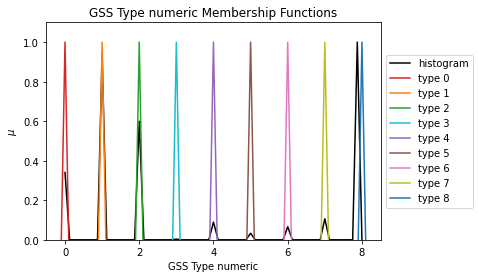

<function matplotlib.pyplot.show(close=None, block=None)>

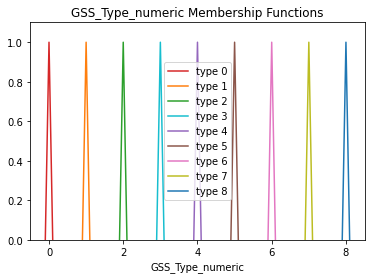

In [11]:
input_name = predictors_final[0]

membership_function1 = [-.1, 0, .1]
membership_function2 = [0.9, 1, 1.1]
membership_function3 = [1.9, 2, 2.1]
membership_function4 = [2.9, 3, 3.1]
membership_function5 = [3.9, 4, 4.1]
membership_function6 = [4.9, 5, 5.1]
membership_function7 = [5.9, 6, 6.1]
membership_function8 = [6.9, 7, 7.1]
membership_function9 = [7.9, 8, 8.1]
mfs = [membership_function1, membership_function2, membership_function3, membership_function4, membership_function5,
       membership_function6, membership_function7, membership_function8, membership_function9]
# ['tab:blue', ':orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink'
#           'tab:gray', 'tab:olive', 'tab:cyan']
# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=64,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['type 0', 'type 1', 'type 2', 'type 3', 'type 4', 'type 5', 'type 6', 'type 7', 'type 8'],
                                        colors_mfs=['tab:red', 'tab:orange','tab:green','tab:cyan', 'tab:purple','tab:brown','tab:pink','tab:olive', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                      membership_function_labels=['type 0', 'type 1', 'type 2', 'type 3', 'type 4', 'type 5', 'type 6', 'type 7', 'type 8'],
                                        colors_mfs=['tab:red', 'tab:orange','tab:green','tab:cyan', 'tab:purple','tab:brown','tab:pink','tab:olive', 'tab:blue'])
plt.show

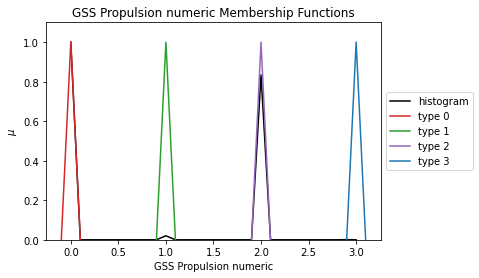

<function matplotlib.pyplot.show(close=None, block=None)>

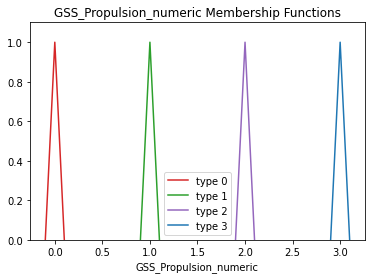

In [12]:
input_name = predictors_final[1]

membership_function1 = [-.1, 0, .1]
membership_function2 = [0.9, 1, 1.1]
membership_function3 = [1.9, 2, 2.1]
membership_function4 = [2.9, 3, 3.1]
mfs = [membership_function1, membership_function2, membership_function3, membership_function4]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['type 0', 'type 1', 'type 2', 'type 3'],
                                        colors_mfs=['tab:red', 'tab:green', 'tab:purple', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                      membership_function_labels=['type 0', 'type 1', 'type 2', 'type 3'],
                                      colors_mfs=['tab:red', 'tab:green', 'tab:purple', 'tab:blue'])
plt.show

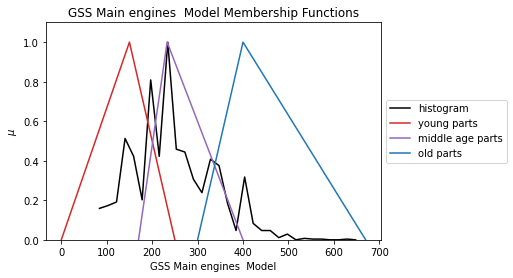

<function matplotlib.pyplot.show(close=None, block=None)>

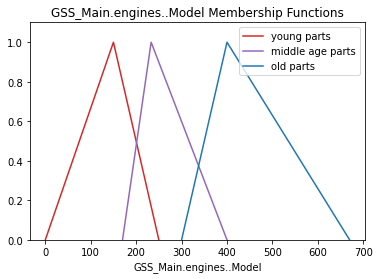

In [13]:
input_name = predictors_final[2]

membership_function1 = [0, 150, 250]
membership_function2 = [170, 233, 400]
membership_function3 = [300, 400, 670]

mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions with the scaled histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['young parts', 'middle age parts', 'old parts'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                        membership_function_labels=['young parts', 'middle age parts', 'old parts'])
plt.show

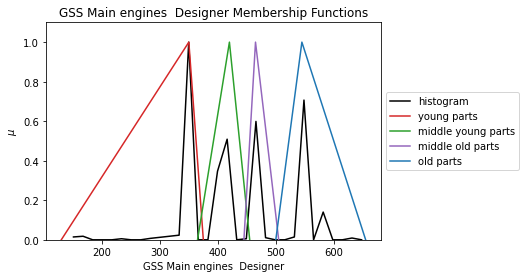

<function matplotlib.pyplot.show(close=None, block=None)>

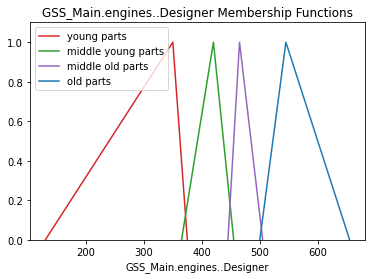

In [14]:
input_name = predictors_final[3]

membership_function1 = [130, 350, 375]
membership_function2 = [365, 420, 455]
membership_function3 = [445, 465, 505]
membership_function4 = [500, 545, 655]
mfs = [membership_function1, membership_function2, membership_function3, membership_function4]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['young parts', 'middle young parts', 'middle old parts', 'old parts'],
                                        colors_mfs=['tab:red', 'tab:green','tab:purple', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                        membership_function_labels=['young parts', 'middle young parts', 'middle old parts', 'old parts'],
                                        colors_mfs=['tab:red','tab:green', 'tab:purple', 'tab:blue'])
plt.show

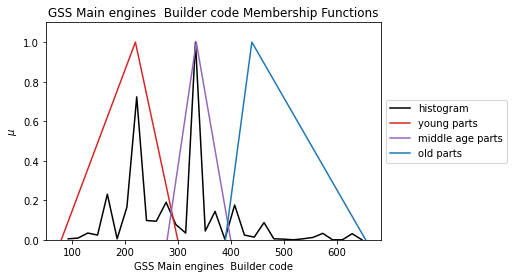

<function matplotlib.pyplot.show(close=None, block=None)>

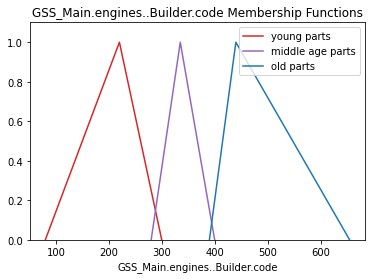

In [15]:
input_name = predictors_final[4]

membership_function1 = [80, 220, 300]
membership_function2 = [280, 335, 400]
membership_function3 = [390, 440, 655]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['young parts', 'middle age parts', 'old parts'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                        membership_function_labels=['young parts', 'middle age parts', 'old parts'])
plt.show

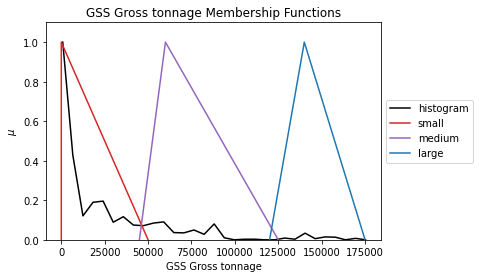

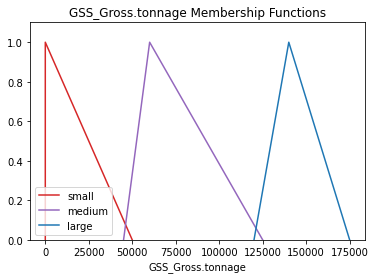

In [16]:
input_name = predictors_final[5]

membership_function1 = [0, 0, 50000]
membership_function2 = [45000, 60000, 125000]
membership_function3 = [120000, 140000, 175000]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['small', 'medium', 'large'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

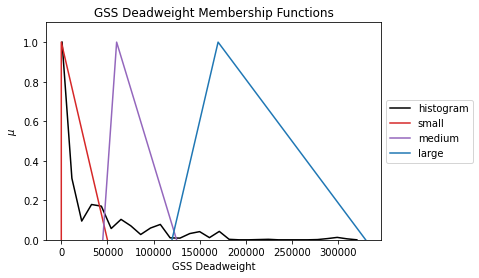

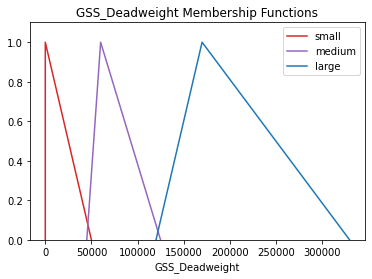

In [17]:
input_name = predictors_final[6]

membership_function1 = [0, 0, 50000]
membership_function2 = [45000, 60000, 125000]
membership_function3 = [120000, 170000, 330000]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['small', 'medium', 'large'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

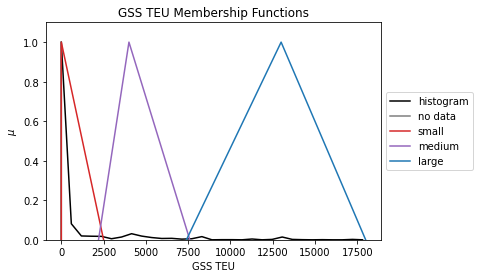

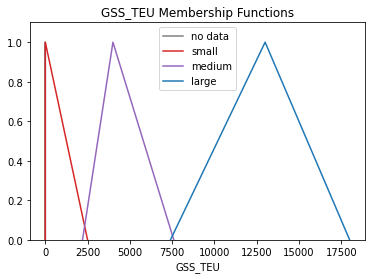

In [29]:
input_name = predictors_final[7]

membership_function0 = [-1.1, -1, -.9]
membership_function1 = [0, 0, 2500]
membership_function2 = [2200, 4000, 7600]
membership_function3 = [7400, 13000, 18000]
mfs = [membership_function0, membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['no data', 'small', 'medium', 'large'],
                                        colors_mfs=['tab:grey','tab:red', 'tab:purple', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                        membership_function_labels=['no data', 'small', 'medium', 'large'],
                                        colors_mfs=['tab:grey','tab:red', 'tab:purple', 'tab:blue'])
plt.show()

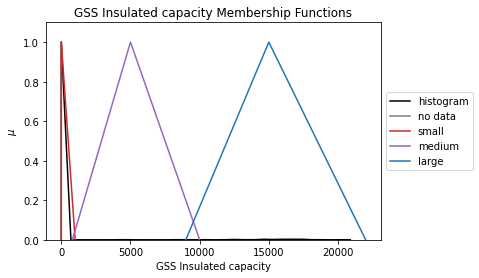

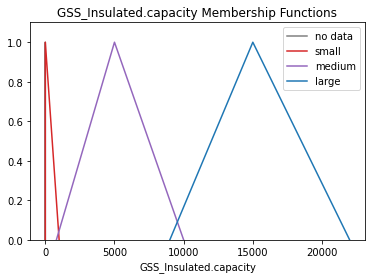

In [19]:
input_name = predictors_final[8]

membership_function1 = [-1.1, -1, -.9]
membership_function2 = [0, 0, 1000]
membership_function3 = [800, 5000, 10000]
membership_function4 = [9000, 15000, 22000]
mfs = [membership_function1, membership_function2, membership_function3, membership_function4]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['no data', 'small', 'medium', 'large'],
                                        colors_mfs=['tab:grey','tab:red', 'tab:purple', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                      membership_function_labels=['no data', 'small', 'medium', 'large'],
                                      colors_mfs=['tab:grey','tab:red', 'tab:purple', 'tab:blue'])
plt.show()

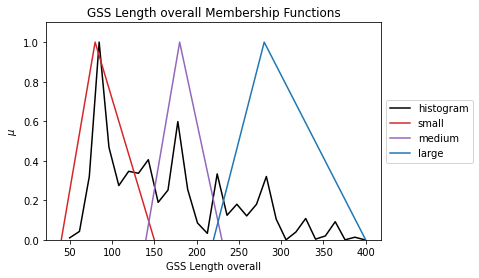

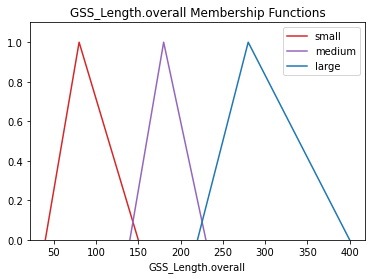

In [20]:
input_name = predictors_final[9]

membership_function1 = [40, 80, 150]
membership_function2 = [140, 180, 230]
membership_function3 = [220, 280, 400]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['small', 'medium', 'large'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

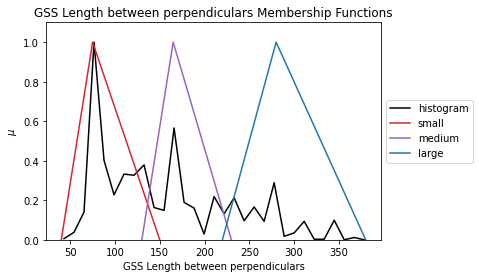

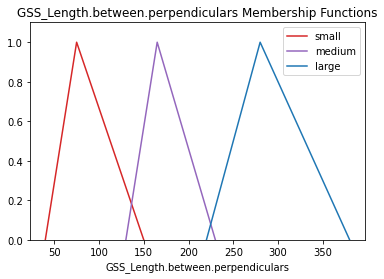

In [21]:
input_name = predictors_final[10]

membership_function1 = [40, 75, 150]
membership_function2 = [130, 165, 230]
membership_function3 = [220, 280, 380]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['small', 'medium', 'large'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

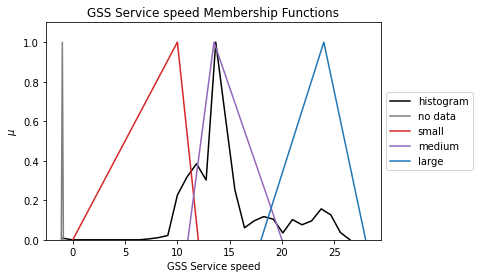

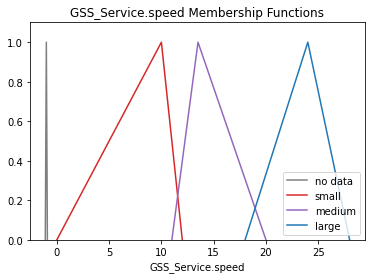

In [22]:
input_name = predictors_final[11]

membership_function0 = [-1.1, -1, -.9]
membership_function1 = [0, 10, 12]
membership_function2 = [11, 13.5, 20]
membership_function3 = [18, 24, 28]
mfs = [membership_function0, membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['no data', 'small', 'medium', 'large'],
                                        colors_mfs=['tab:grey', 'tab:red', 'tab:purple', 'tab:blue'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['no data', 'small', 'medium', 'large'],
                                        colors_mfs=['tab:grey', 'tab:red', 'tab:purple', 'tab:blue'])
plt.show()

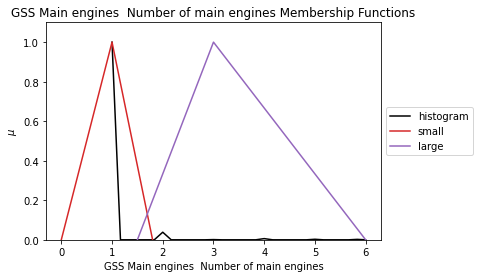

<function matplotlib.pyplot.show(close=None, block=None)>

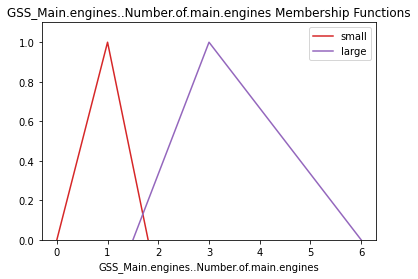

In [23]:
input_name = predictors_final[12]

membership_function1 = [0, 1, 1.8]
membership_function2 = [1.5, 3, 6]
mfs = [membership_function1, membership_function2]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                      membership_function_labels=['small', 'large'],
                                      colors_mfs=['tab:red', 'tab:purple'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs,
                                      membership_function_labels=['small', 'large'],
                                      colors_mfs=['tab:red', 'tab:purple'])
plt.show

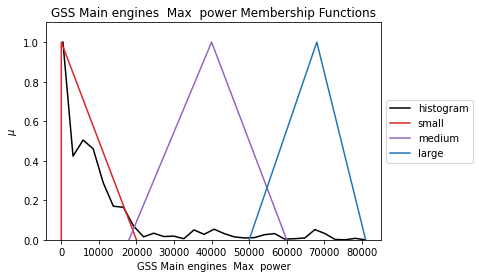

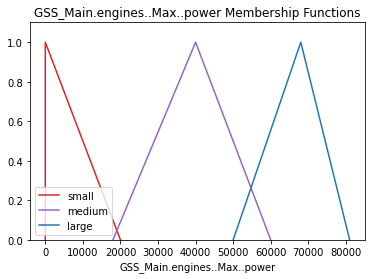

In [24]:
input_name = predictors_final[13]

membership_function1 = [0, 0, 20000]
membership_function2 = [18000, 40000, 60000]
membership_function3 = [50000, 68000, 81000]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['small', 'medium', 'large'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

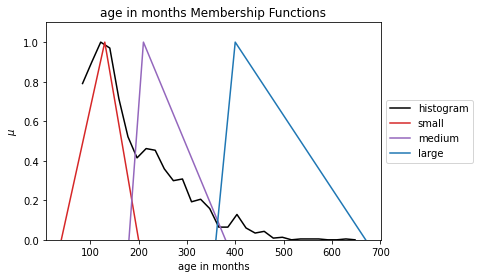

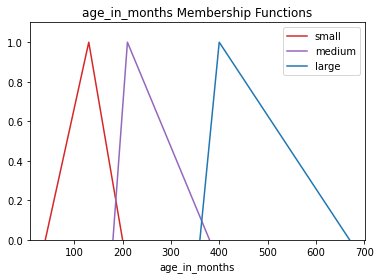

In [25]:
input_name = predictors_final[14]

membership_function1 = [40, 130, 200]
membership_function2 = [180, 210, 380]
membership_function3 = [360, 400, 670]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions scaled with the histogram for viewing purposes
fig, ax = plt.subplots()
out_ax = show_histogram_of_input_values(ax, input_name, sloopschepen, show_hist = True, bins_input=30,
                                        show_smoothed_hist=False, smooth_factor=5, membership_functions=mfs,
                                        membership_function_labels=['young', 'middle age', 'old'])
plt.show()

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['young', 'middle age', 'old'])
plt.show()

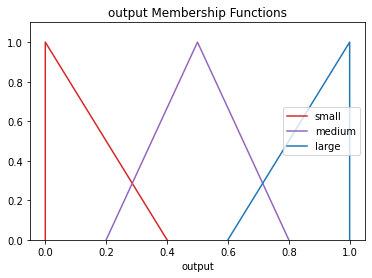

In [27]:
# Fixed membership functions for intermediate layers 
input_name = 'output'

membership_function1 = [0, 0, .4]
membership_function2 = [.2, .5, .8]
membership_function3 = [.6, 1, 1]
mfs = [membership_function1, membership_function2, membership_function3]

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large'])
plt.show()

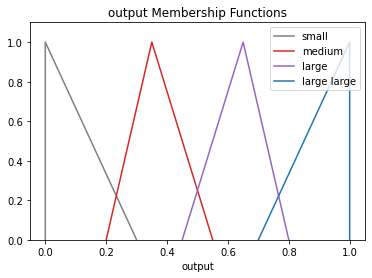

In [33]:
# Fixed membership functions for intermediate layers size 3_1
input_name = 'output'

membership_function1 = [0, 0, .3]
membership_function2 = [.2, .35, .55]
membership_function3 = [.45, .65, .8]
membership_function4 = [.7, 1, 1]
mfs = [membership_function1, membership_function2, membership_function3, membership_function4]

# Show the membership functions as they are
fig, ax = plt.subplots()
out_ax = display_membership_functions(ax, input_name, mfs, membership_function_labels=['small', 'medium', 'large', 'large large'],
                                        colors_mfs=['tab:grey', 'tab:red', 'tab:purple', 'tab:blue'])
plt.show()